In [1]:
from models import BURGERS

from torch import nn

## **Burgers' Equation**

Solving the Burgers' equation using a PINN

Burgers': $\mathcal{N}[u(x, t)]=u_t+u u_x-\nu u_{x x}$

with conditions: 
\begin{aligned}
u(x, 0)=-\sin (\pi x), \quad &x \in[-1,1] . \\
u(-1, t)=0, \quad u(1, t)=0, \quad &t \in[0,1]
\end{aligned}

In [2]:
model = BURGERS(n_hidden_layers=4, n_neurons_per_layer=20, activation = nn.Tanh)

# print number of trainable parameters
num_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nNumber of trainable parameters: {num_trainable_params}")

Using device: cuda

Domain setup complete with 10000 collocation points, 100 initial points, and 100 boundary points.

Number of trainable parameters: 1761


In [3]:
losses = model.train(adam_epochs=1000, lbfgs_epochs=50000, verbose = True)

Starting Adam optimization...


/home/karnav/anaconda3/lib/python3.11/site-packages/torch/autograd/graph.py:825: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /opt/conda/conda-bld/pytorch_1729647429097/work/aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Adam - Epoch 0/1000, Loss: 6.947626e-01
Adam - Epoch 100/1000, Loss: 2.320045e-01
Adam - Epoch 200/1000, Loss: 1.443528e-01
Adam - Epoch 300/1000, Loss: 1.248454e-01
Adam - Epoch 400/1000, Loss: 1.104611e-01
Adam - Epoch 500/1000, Loss: 1.012909e-01
Adam - Epoch 600/1000, Loss: 9.433250e-02
Adam - Epoch 700/1000, Loss: 8.859009e-02
Adam - Epoch 800/1000, Loss: 8.445230e-02
Adam - Epoch 900/1000, Loss: 7.987575e-02
Adam - Epoch 999/1000, Loss: 7.436889e-02

Starting L-BFGS optimization...
L-BFGS - Iteration 100, Loss: 3.784791e-02
L-BFGS - Iteration 200, Loss: 1.428394e-02
L-BFGS - Iteration 300, Loss: 7.623750e-03
L-BFGS - Iteration 400, Loss: 4.455914e-03
L-BFGS - Iteration 500, Loss: 2.389294e-03
L-BFGS - Iteration 600, Loss: 1.435788e-03
L-BFGS - Iteration 700, Loss: 1.126929e-03
L-BFGS - Iteration 800, Loss: 8.416555e-04
L-BFGS - Iteration 900, Loss: 6.445645e-04
L-BFGS - Iteration 1000, Loss: 4.872160e-04
L-BFGS - Iteration 1100, Loss: 3.942983e-04
L-BFGS - Iteration 1200, Loss: 3

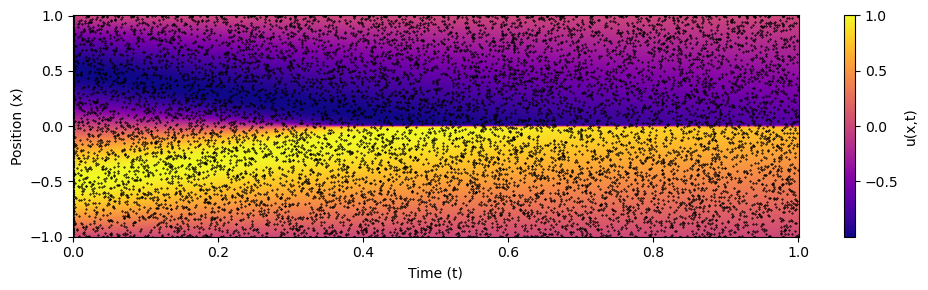

In [4]:
model.plot_spacetime()

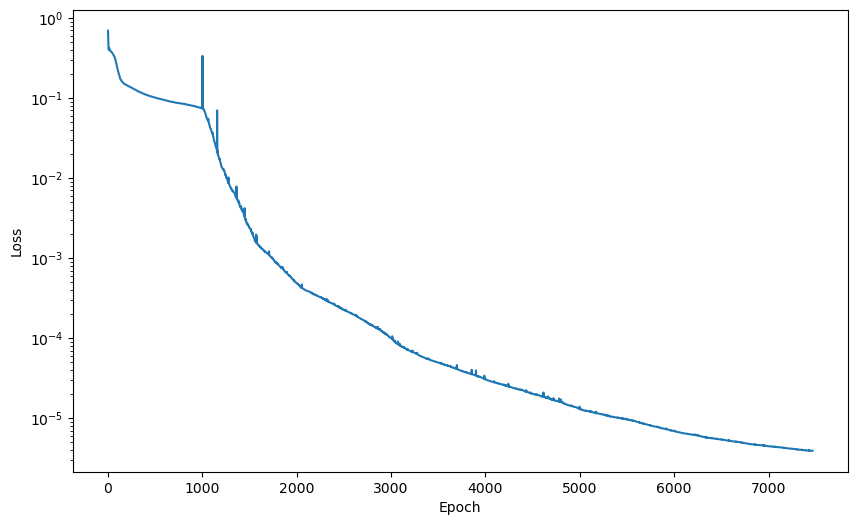

In [5]:
model.plot_losses(losses)

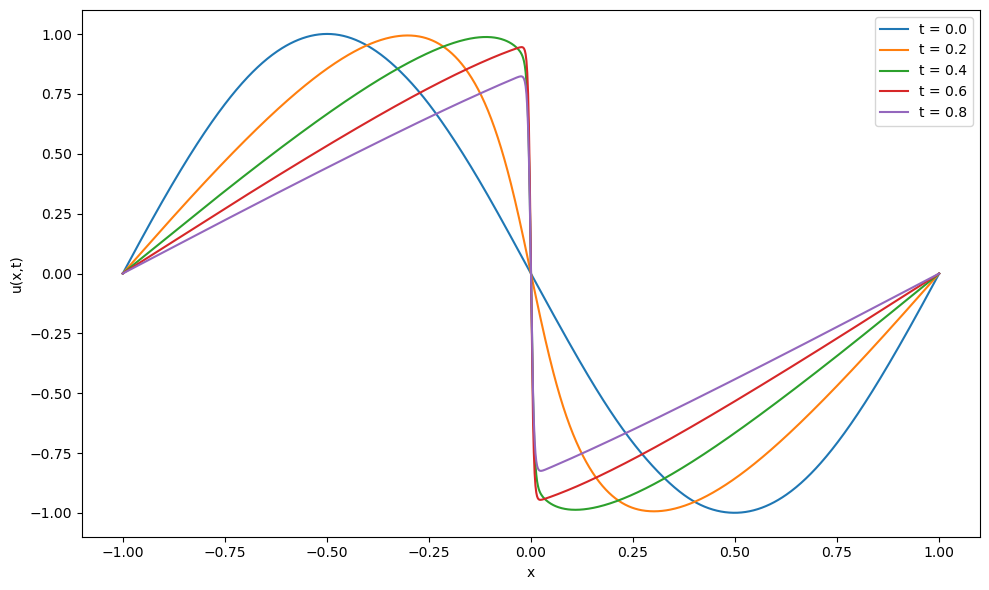

In [6]:
model.plot_profiles()